In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib


In [2]:
# Upload dataset terlebih dahulu di Google Colab
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# Fitur yang digunakan
selected_features = [
    'Age', 'MonthlyIncome', 'YearsAtCompany', 'JobLevel', 'Education',
    'DistanceFromHome', 'OverTime', 'JobSatisfaction',
    'EnvironmentSatisfaction', 'WorkLifeBalance', 'BusinessTravel'
]

# Encode kolom kategorikal
df_encoded = df.copy()
for col in ['OverTime', 'BusinessTravel']:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

X = df_encoded[selected_features]
y = LabelEncoder().fit_transform(df_encoded['Attrition'])

# Standarisasi numerik
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/tmp/ipython-input-3-3914178070.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_features] = scaler.fit_transform(X[numerical_features])


In [4]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


Akurasi: 0.8537414965986394
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       255
           1       0.33      0.10      0.16        39

    accuracy                           0.85       294
   macro avg       0.60      0.54      0.54       294
weighted avg       0.80      0.85      0.82       294



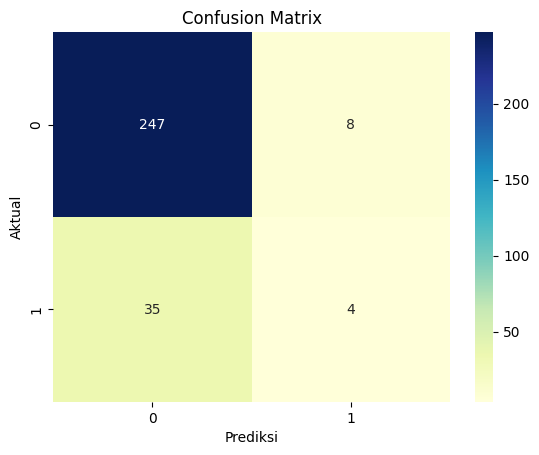

In [5]:
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()


In [6]:
joblib.dump(model, 'model_attrition_rf.pkl')
joblib.dump(scaler, 'scaler_attrition_rf.pkl')


['scaler_attrition_rf.pkl']